# COMP4318/COMP5318 Assignment 2

In this template, we have provided data loading code and section headings to help structure your notebook. Please refer to the assignment specification pdf to guide the content of your notebook and report.


(Add SIDs here)

# Setup

In [2]:
# Please include your imports in this cell
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import time
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [3]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Data loading, exploration, and preprocessing

## Data loading

In [4]:
# Load data files assuming Assignment2Data folder 
# is present in the same directory as the notebook
X_train = np.load('Assignment2Data/X_train.npy')
y_train = np.load('Assignment2Data/y_train.npy')
X_test = np.load('Assignment2Data/X_test.npy')
y_test = np.load('Assignment2Data/y_test.npy')

## Data exploration

In [5]:
print(f"Shape of X_train_full: {X_train.shape}")
print(f"Shape of y_train_full: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train_full: (13673, 28, 28, 3)
Shape of y_train_full: (13673,)
Shape of X_test: (3419, 28, 28, 3)
Shape of y_test: (3419,)


There are 13,673 number of samplesin the dataset. The dataset consists of 2D images, and each image has a size of 28 pixels in height and 28 pixels in width. 3 represents the number of color channels for each image, using the RGB (Red, Green, Blue) color channels.

In [6]:
import numpy as np


combined_data = np.concatenate((X_train, X_test), axis=0)
mean = np.mean(combined_data, axis=0)
std = np.std(combined_data, axis=0)
z_score_threshold = 3
z_scores = np.abs((combined_data - mean) / std)
outliers = z_scores > z_score_threshold
outlier_indices = np.where(np.any(outliers, axis=1))

num_outliers = np.sum(outliers)

print("Number of outliers:", num_outliers)



Number of outliers: 210092


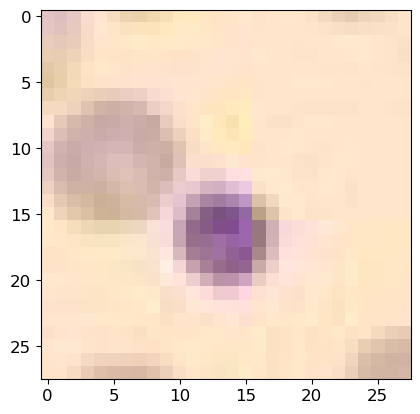

In [7]:
plt.imshow(X_train[0], cmap="viridis")
plt.show()

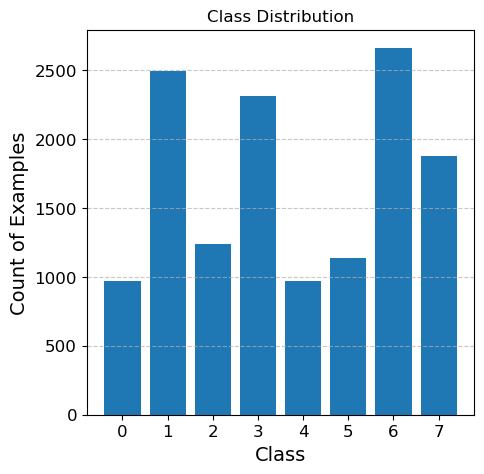

In [8]:
# Count the occurrences of each class in y_train
unique_classes, class_counts = np.unique(y_train, return_counts=True)

# Create a bar plot
plt.figure(figsize=(5, 5)) 
plt.bar(unique_classes, class_counts)

# Customize the plot
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count of Examples')
plt.xticks(unique_classes)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()


In [9]:
misdata_X_train = np.isnan(X_train)
missing_count_X_train = np.sum(misdata_X_train)
print(f"Missing data in X_train: {missing_count_X_train} missing values")

# Check for missing data in y_train
misdata_y_train = np.isnan(y_train)
missing_count_y_train = np.sum(misdata_y_train)
print(f"Missing data in y_train: {missing_count_y_train} missing values")

# Check for missing data in X_test
misdata_X_test = np.isnan(X_test)
missing_count_X_test = np.sum(misdata_X_test)
print(f"Missing data in X_test: {missing_count_X_test} missing values")

# Check for missing data in y_test
misdata_y_test = np.isnan(y_test)
missing_count_y_test = np.sum(misdata_y_test)
print(f"Missing data in y_test: {missing_count_y_test} missing values")

Missing data in X_train: 0 missing values
Missing data in y_train: 0 missing values
Missing data in X_test: 0 missing values
Missing data in y_test: 0 missing values


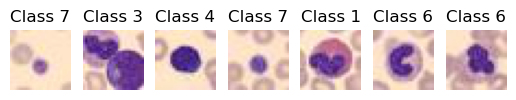

In [10]:
import matplotlib.pyplot as plt

num_examples_to_visualize = 7

for i in range(num_examples_to_visualize):
    plt.subplot(1, num_examples_to_visualize, i + 1)
    plt.imshow(X_train[i])
    plt.title(f'Class {y_train[i]}')
    plt.axis('off')

plt.show()


In [11]:
means_train = np.mean(X_train, axis=(0, 1, 2))
stds_train = np.std(X_train, axis=(0, 1, 2))
means_test = np.mean(X_test, axis=(0, 1, 2))
stds_test = np.std(X_test, axis=(0, 1, 2))

print("Mean Pixel Intensities:", means_train,means_test)
print("Standard Deviation of Pixel Intensities:", stds_train,stds_test)

Mean Pixel Intensities: [202.49162453 168.14720953 177.49823222] [202.75994443 168.42197228 177.62260268]
Standard Deviation of Pixel Intensities: [54.98262486 61.59777139 30.06020585] [54.89946502 61.56902794 30.07444635]


## Preprocessing

In [12]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train) 

In [13]:
X_train_normalized = (X_train - means_train) / stds_train
X_test_normalized = (X_test - means_test) / stds_test


In [14]:
from sklearn.model_selection import train_test_split

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_normalized, y_train, test_size=0.25, random_state=0)

In [15]:
Y_labels = y_train[:5]  
print(Y_labels)


[7 3 4 7 1]


In [16]:
from keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train_split, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

In [17]:
X_train_flattened = X_train_split.reshape(X_train_split.shape[0], -1)
X_val_flattened = X_val_split.reshape(X_val_split.shape[0], -1)
X_test_flattened = X_test_normalized.reshape(X_test_normalized.shape[0], -1)


Fully connected neural networks typically expect 1D input. hence flattened the image by 3D

In [17]:
#from sklearn.preprocessing import RobustScaler
#scaler = RobustScaler()
#X_train_scaled = scaler.fit_transform(X_train_split)
#X_val_scaled = scaler.transform(X_val_split)
#X_test_scaled = scaler.transform(X_test_normalized)

In [18]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_flattened)
X_test_scaled = scaler.transform(X_test_flattened)


In [19]:
from sklearn.decomposition import PCA
n_components = 2
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_flattened)
X_val_pca = pca.transform(X_val_flattened)
principal_components = pca.components_
print("Original Training Data Shape:", X_val_flattened.shape)
print("Transformed Training Data Shape ({} Principal Components):".format(n_components), X_train_pca.shape)
print("\nPrincipal Components:\n", principal_components)
print("\nVariance Explained by Each Principal Component:\n", pca.explained_variance_ratio_)


Original Training Data Shape: (3419, 2352)
Transformed Training Data Shape (2 Principal Components): (10254, 2)

Principal Components:
 [[ 0.00241882  0.00313767 -0.00207349 ...  0.00364656  0.00369474
   0.00432693]
 [-0.0027982  -0.0038263   0.0043301  ... -0.00157914 -0.0013259
  -0.00405554]]

Variance Explained by Each Principal Component:
 [0.21611584 0.08339614]


Robust scaling is a data preprocessing technique that is particularly useful when dealing with datasets that contain outliers. It aims to scale the data while being robust to extreme values, such as outliers. 

## Examples of preprocessed data
Please print/display some examples of your preprocessed data here. 

# Algorithm design and setup

## Model 1 - Fully Connected Neural Network

In [20]:
from sklearn.metrics import accuracy_score
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical  

input_layer = Input(shape=(X_train_scaled.shape[1],))
hidden_layer1 = Dense(128, activation='relu')(input_layer)
dropout_layer = Dropout(0.5)(hidden_layer1) 
hidden_layer2 = Dense(64, activation='relu')(dropout_layer)
output_layer = Dense(10, activation='softmax')(hidden_layer2)  


model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train_one_hot)

y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
test_accuracy = accuracy_score(y_test, y_pred_classes)

print(f"Test Accuracy: {test_accuracy:.4f}")


107/107 [==============================] - 0s 803us/step
Test Accuracy: 0.6634


## Model 2 - Convolutional Neural Network

In [21]:
print(X_train.shape)

(13673, 28, 28, 3)


In [21]:
from sklearn.metrics import accuracy_score
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

input_layer = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))
conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_layer)
maxpool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(maxpool1)
maxpool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flatten = Flatten()(maxpool2)
dense1 = Dense(128, activation='relu')(flatten)
dropout = Dropout(0.5)(dense1)
output_layer = Dense(10, activation='softmax')(dropout)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

X_train_reshaped = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], X_train.shape[3])


y_train_encode = to_categorical(y_train, 10)
history = model.fit(X_train_reshaped, y_train_encode,
                    validation_split=0.25)


X_test_reshaped = X_test.reshape(-1, X_test.shape[1], X_test.shape[2], X_test.shape[3])


y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
test_accuracy = accuracy_score(y_test, y_pred_classes)

print(f"Test Accuracy: {test_accuracy:.4f}")


107/107 [==============================] - 1s 5ms/step
Test Accuracy: 0.6835


## Model 3 - Algorithm Choice 1

In [23]:
from sklearn import svm
from sklearn.metrics import accuracy_score

svm_classifier = svm.SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train_pca, y_train_split)

y_val_pred = svm_classifier.predict(X_val_pca)

accuracy = accuracy_score(y_val_split, y_val_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.5609827434922492


## Model 4 - Algorithm Choice 2

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

rf_classifier.fit(X_train_pca, y_train_split)

y_val_pred = rf_classifier.predict(X_val_pca)

accuracy = accuracy_score(y_val_split, y_val_pred)
print("Validation Accuracy:", accuracy)


Validation Accuracy: 0.5384615384615384


# Hyperparameter tuning

## Model 1 - Fully Connected Neural Network

In [22]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier 

def create_mlp(optimizer='adam'):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

mlp = KerasClassifier(model=create_mlp, verbose=0)
param_grid = {
    'epochs': [50],
    'batch_size': [200],
    'optimizer': ['Adam']
}
grid = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train_scaled, y_train_one_hot)
print(f"Best: {grid_result.best_score_:.3f} using {grid_result.best_params_}")
best_mlp = grid_result.best_estimator_.model

Best: 0.854 using {'batch_size': 200, 'epochs': 50, 'optimizer': 'Adam'}


## Model 2 - Convolutional Neural Network

In [ ]:
def create_cnn(optimizer='adam'):
    input_layer = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))
    conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_layer)
    maxpool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(maxpool1)
    maxpool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    flatten = Flatten()(maxpool2)
    dense1 = Dense(128, activation='relu')(flatten)
    dropout = Dropout(0.5)(dense1)
    output_layer = Dense(10, activation='softmax')(dropout)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
cnn = KerasClassifier(model=create_cnn, verbose=0)
param_grid = {
    'epochs': [10, 20],
    'batch_size': [128, 256],
    'optimizer': ['Adam', 'SGD']
}
grid = GridSearchCV(estimator=cnn, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train_reshaped, y_train_encode)
print(f"Best: {grid_result.best_score_:.3f} using {grid_result.best_params_}")
best_cnn = grid_result.best_estimator_.model

## Model 3 - Algorithm Choice 1

In [ ]:
from sklearn import svm

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
svm_grid = GridSearchCV(svm.SVC(), param_grid, cv=3)
svm_grid_result = svm_grid.fit(X_train_pca, y_train_split)
print(f"Best: {svm_grid_result.best_score_:.3f} using {svm_grid_result.best_params_}")
best_svm = svm_grid_result.best_estimator_

## Model 4 - Algorithm Choice 2

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=3)
rf_grid_result = rf_grid.fit(X_train_pca, y_train_split)
print(f"Best: {rf_grid_result.best_score_:.3f} using {rf_grid_result.best_params_}")
best_rf = rf_grid_result.best_estimator_

# Final Models

## Model 1 - Fully Connected Neural Network

In [23]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

svm_grid = GridSearchCV(svm.SVC(), param_grid, cv=3)
svm_grid_result = svm_grid.fit(X_train_pca, y_train_split)

# Get the best mean cross-validated score and best parameters
best_score = svm_grid_result.best_score_
best_params = svm_grid_result.best_params_

# Print the results
print(f"Best Mean Cross-Validated Score: {best_score:.3f}")
print("Best Parameters:")
for param, value in best_params.items():
    print(f"  {param}: {value}")


Best Mean Cross-Validated Score: 0.588
Best Parameters:
  C: 10
  kernel: rbf


## Model 2 - Convolutional Neural Network

## Model 3 - Algorithm Choice 1

## Model 4 - Algorithm Choice 2